In [1]:
import sys
sys.path.insert(1, '../src')

### A 1D Object under constant velocity

In [2]:
import filters.model

In [3]:
import numpy as np
import matplotlib.pyplot as plt

dt = 1
steps = 50

true_position = 0
true_velocity = 1

np.random.seed(1)

q = 1e-3 # Process noise
r = 1 # Measurement noise

c = 0.8 # Sensor measurement chance


model = filters.model.KalmanFilter(
    2, 
    np.array([
        [ 1, dt ],
        [ 0, 1 ]
    ]), 
    np.array([
        [ 0.25 * dt**4, 0.5 * dt**3 ],
        [ 0.5 * dt**3, dt**2 ]
    ]) * q
)

accelerometer = filters.sensor.Sensor(
    np.array( [ [ 1, 0 ] ] ), 
    np.array( [ [ 1 ] ] ) * (r ** 2), 
    lambda x : np.array([[x + np.random.normal(0, np.sqrt(r))]])
)


model.logger.add_state_translation('position', 
                            np.array([[1, 0]]))
model.logger.add_state_translation('velocity', 
                            np.array([[0, 1]]))

In [4]:
for _ in range(steps):
    # Kalman Filter prediction step
    u = np.array([[0]])
    model.prediction_step(u)

    # Calculate and log true position
    true_position += true_velocity * dt

    model.logger.log_value('position', 'reference', true_position)
    model.logger.log_value('velocity', 'reference', true_velocity)

    # Test if sensor was able to get measurement
    p = np.random.random()
    if p < c:
        # Simulate a noisy measurement
        z = np.array([[true_position + np.random.normal(0, np.sqrt(r))]])
    
        # Kalman Filter correction step
        model.update_step(accelerometer, z)

    model.log()

<Figure size 1200x2400 with 0 Axes>

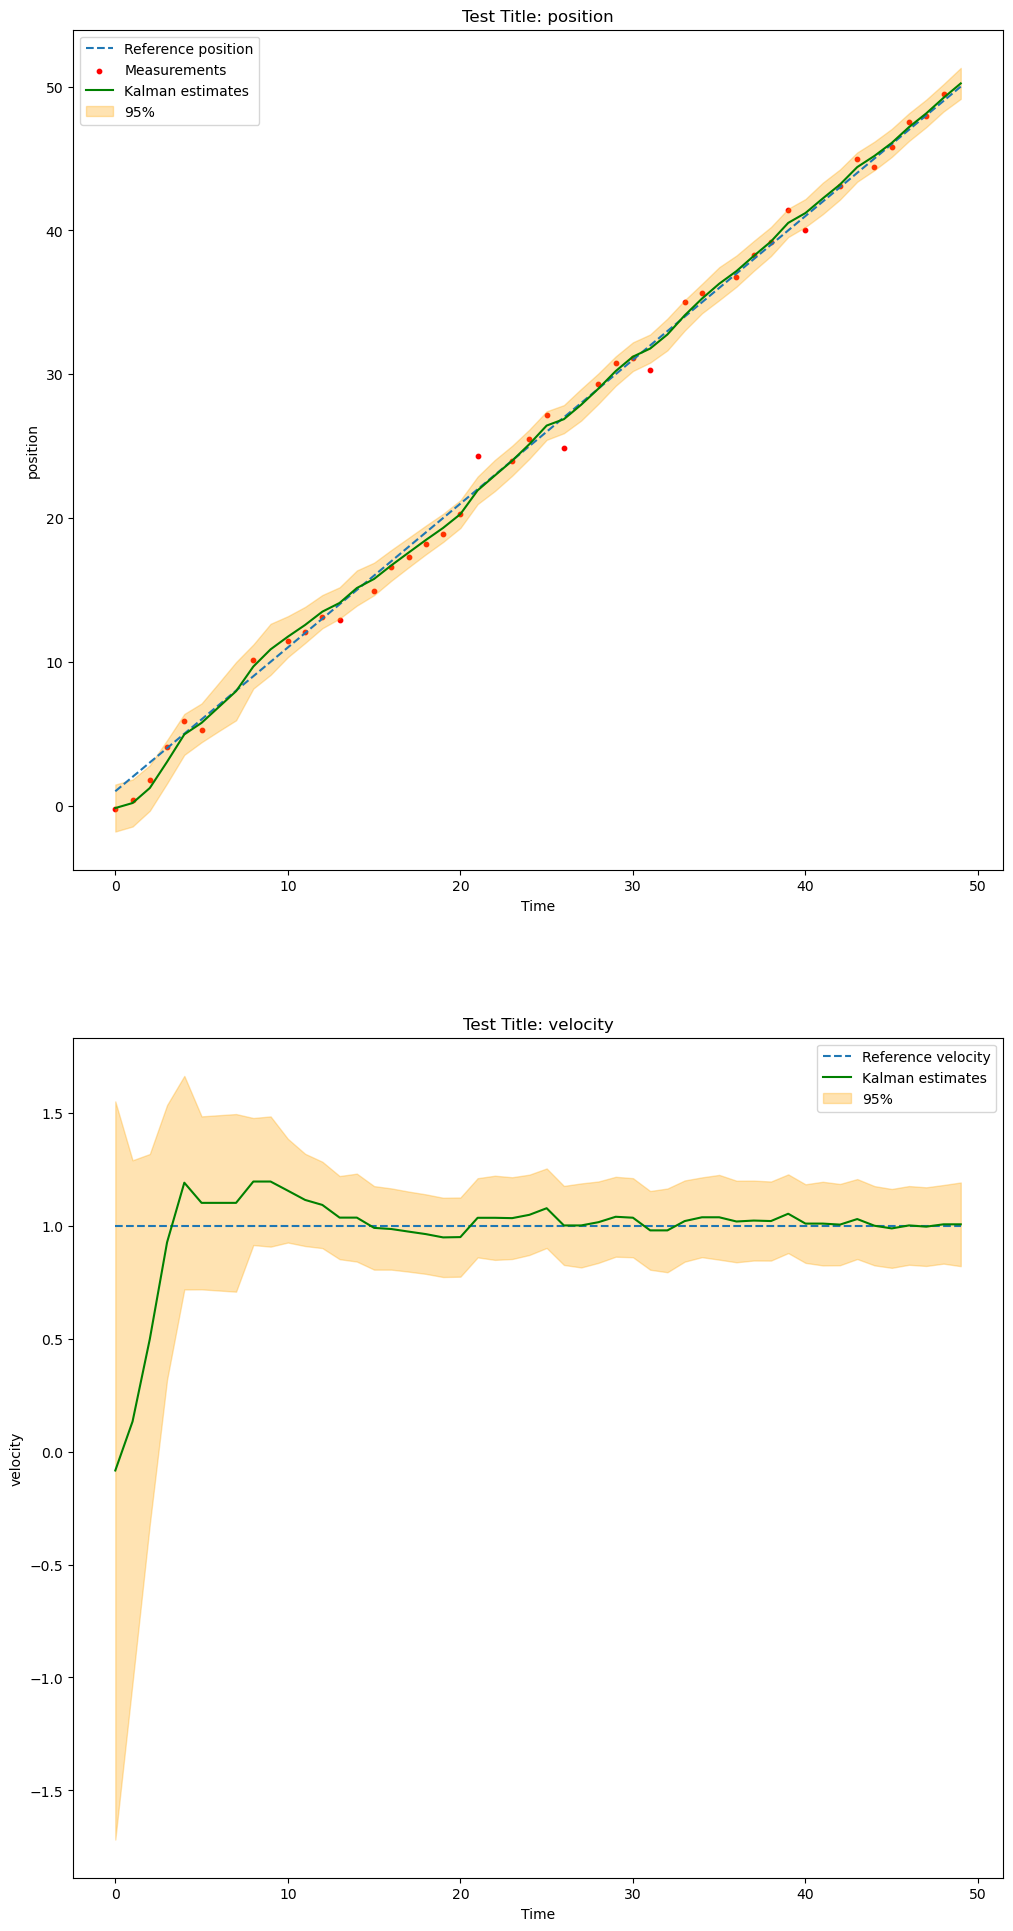

In [5]:
model.logger.plot()